In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from common import fetch_data, get_dual_backtest_result, get_hodl_result, max_drawdown, get_cache_path, save_cache_data, load_cache_data

In [70]:
# Leveraged funding arbitrage

# Fetch and save funding rate history PNL 
from datetime import datetime, timedelta

# Input
min_time = datetime.fromisoformat('2023-05-01').timestamp()
max_time = datetime.fromisoformat('2023-12-31').timestamp()

short_exchange = 'binance'
short_market = 'BTCUSDT'
short_funding_freq = 8 #hour

long_exchange = 'bitmex'
long_market = 'XBTUSD'
long_funding_freq = 12 #hour

leverage_levels = [1, 3, 5, 7]

# Initial variables
results = {}

short_df = load_cache_data(short_exchange, short_market)
short_df['datetime'] = short_df['datetime'].apply(lambda x: pd.to_datetime(x))
short_df = short_df[(short_df['timestamp'] > min_time) & (short_df['timestamp'] < max_time)]

long_df = load_cache_data(long_exchange, long_market)
long_df['datetime'] = long_df['datetime'].apply(lambda x: pd.to_datetime(x))
long_df = long_df[(long_df['timestamp'] > min_time) & (long_df['timestamp'] < max_time)]

for leverage in leverage_levels:
    (result_df, _, _) = get_dual_backtest_result(long_df, short_df, long_funding_freq, short_funding_freq, leverage=leverage)

    if (leverage not in results):
        results[leverage] = {}
    results[leverage] = result_df

# Results are store in 'results' variable

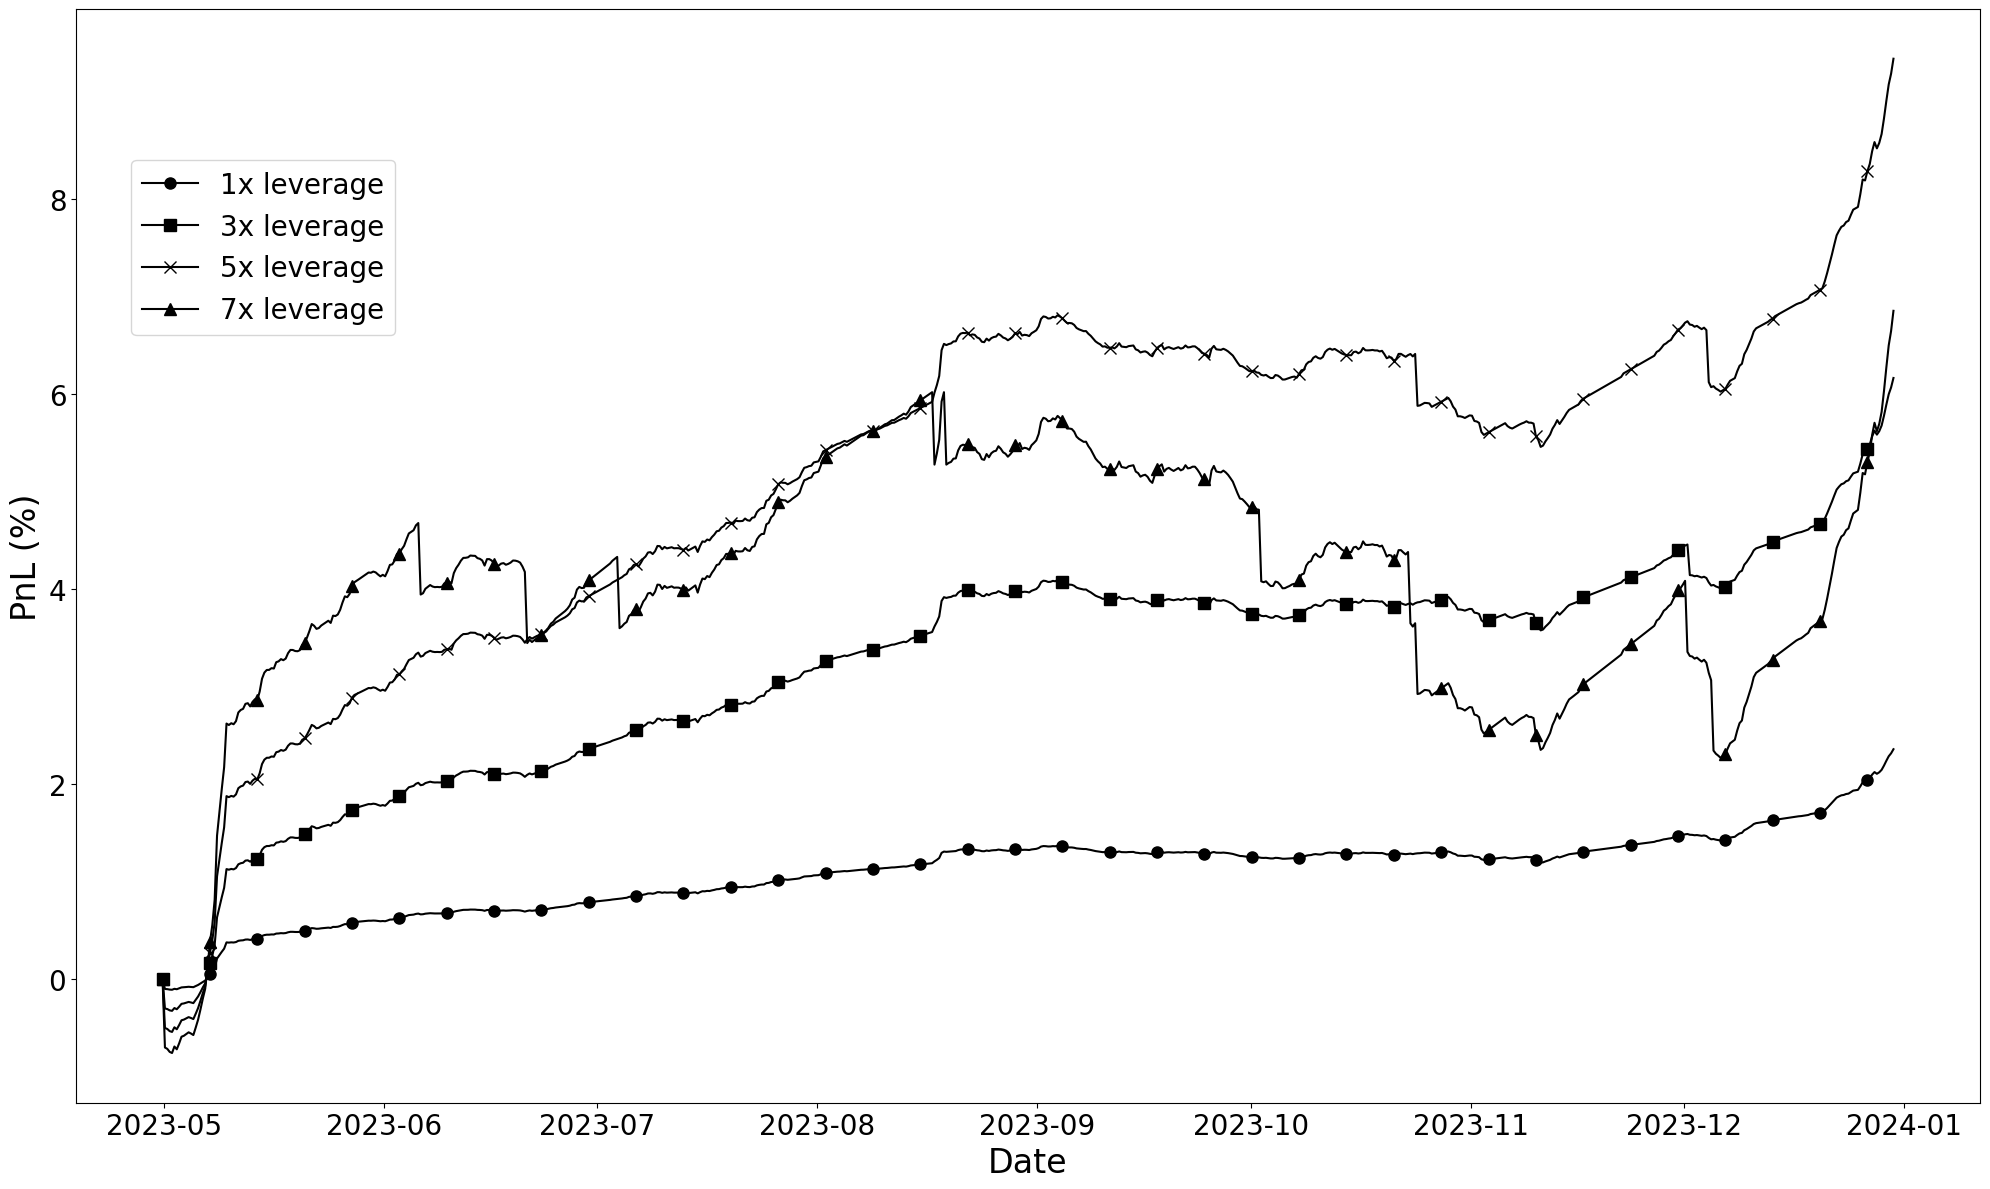

In [71]:
# Plot leveraged funding arbitrage result

# Plot setup
markers = {"1": "o", "3": "s", "5": "x", "7": "^"}
mark_every = {"1": 20, "3": 20, "5": 20, "7": 20}

# Plot
fig, ax = plt.subplots(figsize=(20, 12))

for leverage in leverage_levels:
    result_df = results[leverage]
    line,  = ax.plot(
        result_df["datetime"],
        result_df["total_pnl"] * 100,
        label=f"{leverage}x leverage",
        color="black",
        ms=8,
        marker=markers[str(leverage)],
        markevery=mark_every[str(leverage)]
    )

# Chart settings
lines, labels = ax.get_legend_handles_labels()
plt.xlabel("Date", fontsize=24)
plt.ylabel("PnL (%)", fontsize=24)
ax.legend(lines, labels, loc="upper right", bbox_to_anchor=(0.175, 0.875), fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Ensure a tight layout to avoid label/legend clipping
plt.tight_layout()

plt.savefig(f'./images/{short_exchange}_{short_market}_{long_exchange}_{long_market}_leveraged.png', format='png', dpi=300, bbox_inches='tight')

plt.show()